In [1]:
from datetime import datetime
import datetime as dt
import xarray as xr
import numpy as np
import glob
from dask.distributed import Client

from datacube.api import GridWorkflow

from madmex.wrappers import gwf_query
from madmex.util.xarray import to_float, to_int


2019-12-05 05:59:14,666 - datacube.drivers.driver_cache - driver_cache safe_load: Failed to resolve driver datacube.plugins.index::s3aio_index
2019-12-05 05:59:14,667 - datacube.drivers.driver_cache - driver_cache safe_load: Error was: UndefinedEnvironmentName("'extra' does not exist in evaluation environment.",)
/home/madmex_user/.local/lib/python3.6/site-packages/dask/array/core.py:3864: PerformanceWarning: Increasing number of chunks by factor of 13
2019-12-05 06:01:41,289 - madmex.wrappers - loggerwriter write: /home/madmex_user/.local/lib/python3.6/site-packages/dask/array/core.py:3864: PerformanceWarning: Increasing number of chunks by factor of 13
  **blockwise_kwargs
2019-12-05 06:01:41,291 - madmex.wrappers - loggerwriter write:   **blockwise_kwargs
/home/madmex_user/.local/lib/python3.6/site-packages/distributed/worker.py:3269: UserWarning: Large object of size 25.02 MB detected in task graph: 
2019-12-05 09:12:37,003 - madmex.wrappers - loggerwriter write: /home/madmex_user/

In [2]:
scheduler_file = '/shared_volume/scheduler.json'

In [3]:
client = Client(scheduler_file=scheduler_file)

In [4]:
client

Client Scheduler: tcp://10.0.0.3:8786 Dashboard: http://10.0.0.3:8787/status,Cluster Workers: 2 Cores: 2 Memory: 160.00 GB


In [5]:
client.restart()

Client Scheduler: tcp://10.0.0.3:8786 Dashboard: http://10.0.0.3:8787/status,Cluster Workers: 2 Cores: 2 Memory: 160.00 GB


In [5]:
region = 'Veracruz'
name_of_product = 's2_l2a_10m_scl_mexico'
begin = '2018-01-01'
end = '2019-12-31'
gwf_kwargs = {'region': region, 'product': name_of_product, 'begin': begin, 'end':end}
iterable = gwf_query(**gwf_kwargs)

In [6]:
lista_iter = list(iterable)

In [7]:
dc_tile=(39,-30)
index = [x for x in range(0,len(lista_iter)) if lista_iter[x][0] == dc_tile]

In [8]:
[lista_iter[x][0] for x in range(0,len(lista_iter))]

[(40, -33),
 (41, -33),
 (42, -33),
 (40, -32),
 (42, -32),
 (41, -32),
 (40, -31),
 (41, -31),
 (42, -31),
 (40, -30),
 (40, -29),
 (41, -30),
 (39, -31),
 (38, -30),
 (39, -30),
 (38, -29),
 (39, -29),
 (39, -32)]

In [9]:
var = lista_iter[index[0]]

In [10]:
var

((39, -30), Tile<sources=<xarray.DataArray (time: 63)>
 array([(Dataset <id=828bc7bd-5117-4255-97cc-ff518ca81f6f type=s2_l2a_10m_scl_mexico location=file:///shared_volume/datacube/datacube_ingest/s2_l2a_10m_scl_s3/mexico/s2_l2a_10m_scl_s3_39_-30_20181004170824000000.nc>,),
        (Dataset <id=be1f83ae-43b2-4e98-b0d2-92634244e9f3 type=s2_l2a_10m_scl_mexico location=file:///shared_volume/datacube/datacube_ingest/s2_l2a_10m_scl_s3/mexico/s2_l2a_10m_scl_s3_39_-30_20181006170522000000.nc>,),
        (Dataset <id=7b722688-3566-4208-808b-a6bdcd47c56a type=s2_l2a_10m_scl_mexico location=file:///shared_volume/datacube/datacube_ingest/s2_l2a_10m_scl_s3/mexico/s2_l2a_10m_scl_s3_39_-30_20181009171234000000.nc>,),
        (Dataset <id=03f1eeeb-65a4-4aad-a130-10ca6bdcfbf8 type=s2_l2a_10m_scl_mexico location=file:///shared_volume/datacube/datacube_ingest/s2_l2a_10m_scl_s3/mexico/s2_l2a_10m_scl_s3_39_-30_20181031170221000000.nc>,),
        (Dataset <id=03f1c839-d9c9-4322-a17d-72135c3e2fb6 type=s2_l2a

In [11]:
sr_0 = GridWorkflow.load(var[1],dask_chunks={'x': 400, 'y': 400})


In [12]:
sr_0

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12.480000
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Data variables:
    blue      (time, y, x) uint16 dask.array<chunksize=(1, 400, 400), meta=np.ndarray>
    green     (time, y, x) uint16 dask.array<chunksize=(1, 400, 400), meta=np.ndarray>
    red       (time, y, x) uint16 dask.array<chunksize=(1, 400, 400), meta=np.ndarray>
    nir       (time, y, x) uint16 dask.array<chunksize=(1, 400, 400), meta=np.ndarray>
    pixel_qa  (time, y, x) uint16 dask.array<chunksize=(1, 400, 400), meta=np.ndarray>
Attributes:
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

In [13]:
crs = var[1].geobox.crs

In [14]:
sr_0.attrs['geobox'] = var[1].geobox

In [15]:
sr_0 = sr_0.apply(func=to_float, keep_attrs=True)

In [16]:
#sr_0 = client.persist(sr_0)

In [17]:
sr_1 = sr_0.where(sr_0.pixel_qa.isin([2,4,5,6,7,8,11]))

In [18]:
sr_1['ndvi'] = ((sr_1.nir - sr_1.red) / (sr_1.nir + sr_1.red)) * 10000

In [19]:
#sr_1['ndvi'].attrs['nodata'] = -999.

In [20]:
sr_1 = sr_1.drop(['blue','green','red','nir','pixel_qa'])

In [21]:
sr_1

<xarray.Dataset>
Dimensions:  (time: 63, x: 5002, y: 5002)
Coordinates:
  * time     (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12.480000
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Data variables:
    ndvi     (time, y, x) float64 dask.array<chunksize=(1, 400, 400), meta=np.ndarray>
Attributes:
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...
    geobox:   GeoBox(Geometry({'type': 'Polygon', 'coordinates': [[(-97.87275...

In [22]:
sr_1 = client.persist(sr_1)

## Mean of NDVI through a year

In [ ]:
# Run temporal reductions and rename DataArrays
sr_mean = sr_1.mean('time', keep_attrs=True, skipna=True)

In [24]:
#sr_1 = sr_1.compute(scheduler='threads')

In [26]:
sr_mean

<xarray.Dataset>
Dimensions:   (x: 5002, y: 5002)
Coordinates:
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Data variables:
    blue      (y, x) float64 dask.array<chunksize=(800, 800), meta=np.ndarray>
    green     (y, x) float64 dask.array<chunksize=(800, 800), meta=np.ndarray>
    red       (y, x) float64 dask.array<chunksize=(800, 800), meta=np.ndarray>
    nir       (y, x) float64 dask.array<chunksize=(800, 800), meta=np.ndarray>
    pixel_qa  (y, x) float64 dask.array<chunksize=(800, 800), meta=np.ndarray>
    ndvi      (y, x) float64 dask.array<chunksize=(800, 800), meta=np.ndarray>
Attributes:
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...
    geobox:   GeoBox(Geometry({'type': 'Polygon', 'coordinates': [[(-97.87275...

In [27]:
sr_mean = sr_mean.rename({'ndvi': 'ndvi_mean'})

In [28]:
sr_mean

<xarray.Dataset>
Dimensions:    (x: 5002, y: 5002)
Coordinates:
  * y          (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x          (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Data variables:
    blue       (y, x) float64 dask.array<chunksize=(800, 800), meta=np.ndarray>
    green      (y, x) float64 dask.array<chunksize=(800, 800), meta=np.ndarray>
    red        (y, x) float64 dask.array<chunksize=(800, 800), meta=np.ndarray>
    nir        (y, x) float64 dask.array<chunksize=(800, 800), meta=np.ndarray>
    pixel_qa   (y, x) float64 dask.array<chunksize=(800, 800), meta=np.ndarray>
    ndvi_mean  (y, x) float64 dask.array<chunksize=(800, 800), meta=np.ndarray>
Attributes:
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...
    geobox:   GeoBox(Geometry({'type': 'Polygon', 'coordinates': [[(-97.87275...

In [29]:
sr_mean.ndvi_mean

<xarray.DataArray 'ndvi_mean' (y: 5002, x: 5002)>
dask.array<mean_agg-aggregate, shape=(5002, 5002), dtype=float64, chunksize=(800, 800), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Attributes:
    nodata:   0

In [30]:
sr_mean = sr_mean.apply(to_int)

In [31]:
sr_mean.attrs['crs'] = crs

In [32]:
sr_mean = client.persist(sr_mean)

In [45]:
#sr_mean = sr_mean.compute(scheduler='threads')

In [33]:
#nc_filename = '/home/madmex_user/results/s2_2018-2019_39_-30_ndvi_mean_distributed.nc'

In [34]:
#from datacube.drivers.netcdf import write_dataset_to_netcdf

In [36]:
#write_dataset_to_netcdf(sr_mean,nc_filename)

## Interpolation of NDVI values using a defined period

In [23]:
begin=np.datetime_as_string(sr_1['time'].values[0],unit='D')

In [24]:
begin

'2018-10-04'

In [25]:
begin_time = datetime.strptime(begin, '%Y-%m-%d')

In [26]:
sr_1

<xarray.Dataset>
Dimensions:  (time: 63, x: 5002, y: 5002)
Coordinates:
  * time     (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12.480000
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Data variables:
    ndvi     (time, y, x) float64 dask.array<chunksize=(1, 400, 400), meta=np.ndarray>
Attributes:
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...
    geobox:   GeoBox(Geometry({'type': 'Polygon', 'coordinates': [[(-97.87275...

In [27]:
sr_1 = sr_1.chunk({'time': -1, 'x': 400, 'y': 400})

In [28]:
sr_1['time']

<xarray.DataArray 'time' (time: 63)>
array(['2018-10-04T17:08:24.000000000', '2018-10-06T17:05:22.000000000',
       '2018-10-09T17:12:34.000000000', '2018-10-31T17:02:21.000000000',
       '2018-11-05T17:00:45.000000000', '2018-11-08T17:18:03.000000000',
       '2018-11-15T17:08:06.000000000', '2018-11-30T17:08:08.000000000',
       '2018-12-03T17:18:02.000000000', '2018-12-08T17:17:59.000000000',
       '2018-12-15T17:08:03.000000000', '2018-12-18T17:17:59.000000000',
       '2018-12-20T17:08:07.000000000', '2018-12-23T17:18:03.000000000',
       '2019-01-07T17:18:02.000000000', '2019-01-19T17:08:12.000000000',
       '2019-01-22T17:18:07.000000000', '2019-02-03T17:08:09.000000000',
       '2019-02-06T17:18:04.000000000', '2019-02-11T17:18:07.000000000',
       '2019-02-13T17:08:09.000000000', '2019-02-16T17:17:57.000000000',
       '2019-02-16T17:18:04.000000000', '2019-02-26T17:18:03.100000000',
       '2019-02-26T17:18:11.490000000', '2019-03-08T17:18:02.220000000',
       '2019-03-10T17:08:14.720000000', '2019-03-13T17:18:04.950000000',
       '2019-03-28T17:18:07.370000000', '2019-03-30T17:08:14.400000000',
       '2019-04-04T17:08:13.240000000', '2019-04-09T17:08:16.660000000',
       '2019-04-12T17:18:12.640000000', '2019-04-17T17:18:10.450000000',
       '2019-04-19T17:08:18.570000000', '2019-04-22T17:18:14.370000000',
       '2019-04-27T17:18:11.300000000', '2019-05-02T17:18:15.580000000',
       '2019-05-17T17:18:11.450000000', '2019-05-19T17:08:21.090000000',
       '2019-05-22T17:18:16.420000000', '2019-06-06T17:18:09.850000000',
       '2019-06-08T17:08:20.180000000', '2019-07-03T17:08:17.360000000',
       '2019-07-06T17:18:12.820000000', '2019-07-08T17:08:21.250000000',
       '2019-07-11T17:18:16.590000000', '2019-07-31T17:18:15.760000000',
       '2019-08-02T17:08:16.970000000', '2019-08-10T17:18:14.720000000',
       '2019-08-12T17:08:15.990000000', '2019-08-15T17:18:10.900000000',
       '2019-08-17T17:08:18.440000000', '2019-08-22T17:08:14.620000000',
       '2019-08-30T17:18:11.470000000', '2019-09-01T17:08:12.870000000',
       '2019-09-04T17:18:07.560000000', '2019-09-16T17:08:09.730000000',
       '2019-09-16T17:08:16.270000000', '2019-09-19T17:18:06.890000000',
       '2019-09-21T17:08:12.660000000', '2019-09-24T17:18:08.500000000',
       '2019-09-26T17:08:12.480000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12.480000
Attributes:
    units:    seconds since 1970-01-01 00:00:00

In [29]:
#if using sentinel change to 10D, if using landsat change to 80D
ts_1 = sr_1.ndvi.resample(time='7D', 
                          loffset=begin_time - 
                          datetime.utcfromtimestamp(sr_1['time'][0].values.astype(datetime)*1e-9),
                          keep_attrs=True).nearest(tolerance=dt.timedelta(hours=84)).chunk({'time': -1}).interpolate_na('time')


In [30]:
ts_1

<xarray.DataArray 'ndvi' (time: 52, y: 5002, x: 5002)>
dask.array<transpose, shape=(52, 5002, 5002), dtype=float64, chunksize=(52, 400, 400), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2018-10-03T06:51:36 ... 2019-09-25T06:51:36
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06

In [31]:
ts_1['time']

<xarray.DataArray 'time' (time: 52)>
array(['2018-10-03T06:51:36.000000000', '2018-10-10T06:51:36.000000000',
       '2018-10-17T06:51:36.000000000', '2018-10-24T06:51:36.000000000',
       '2018-10-31T06:51:36.000000000', '2018-11-07T06:51:36.000000000',
       '2018-11-14T06:51:36.000000000', '2018-11-21T06:51:36.000000000',
       '2018-11-28T06:51:36.000000000', '2018-12-05T06:51:36.000000000',
       '2018-12-12T06:51:36.000000000', '2018-12-19T06:51:36.000000000',
       '2018-12-26T06:51:36.000000000', '2019-01-02T06:51:36.000000000',
       '2019-01-09T06:51:36.000000000', '2019-01-16T06:51:36.000000000',
       '2019-01-23T06:51:36.000000000', '2019-01-30T06:51:36.000000000',
       '2019-02-06T06:51:36.000000000', '2019-02-13T06:51:36.000000000',
       '2019-02-20T06:51:36.000000000', '2019-02-27T06:51:36.000000000',
       '2019-03-06T06:51:36.000000000', '2019-03-13T06:51:36.000000000',
       '2019-03-20T06:51:36.000000000', '2019-03-27T06:51:36.000000000',
       '2019-04-03T06:51:36.000000000', '2019-04-10T06:51:36.000000000',
       '2019-04-17T06:51:36.000000000', '2019-04-24T06:51:36.000000000',
       '2019-05-01T06:51:36.000000000', '2019-05-08T06:51:36.000000000',
       '2019-05-15T06:51:36.000000000', '2019-05-22T06:51:36.000000000',
       '2019-05-29T06:51:36.000000000', '2019-06-05T06:51:36.000000000',
       '2019-06-12T06:51:36.000000000', '2019-06-19T06:51:36.000000000',
       '2019-06-26T06:51:36.000000000', '2019-07-03T06:51:36.000000000',
       '2019-07-10T06:51:36.000000000', '2019-07-17T06:51:36.000000000',
       '2019-07-24T06:51:36.000000000', '2019-07-31T06:51:36.000000000',
       '2019-08-07T06:51:36.000000000', '2019-08-14T06:51:36.000000000',
       '2019-08-21T06:51:36.000000000', '2019-08-28T06:51:36.000000000',
       '2019-09-04T06:51:36.000000000', '2019-09-11T06:51:36.000000000',
       '2019-09-18T06:51:36.000000000', '2019-09-25T06:51:36.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-10-03T06:51:36 ... 2019-09-25T06:51:36
Attributes:
    units:    seconds since 1970-01-01 00:00:00

In [32]:
times=np.datetime_as_string(ts_1['time'],unit='D')

In [33]:
times

array(['2018-10-03', '2018-10-10', '2018-10-17', '2018-10-24',
       '2018-10-31', '2018-11-07', '2018-11-14', '2018-11-21',
       '2018-11-28', '2018-12-05', '2018-12-12', '2018-12-19',
       '2018-12-26', '2019-01-02', '2019-01-09', '2019-01-16',
       '2019-01-23', '2019-01-30', '2019-02-06', '2019-02-13',
       '2019-02-20', '2019-02-27', '2019-03-06', '2019-03-13',
       '2019-03-20', '2019-03-27', '2019-04-03', '2019-04-10',
       '2019-04-17', '2019-04-24', '2019-05-01', '2019-05-08',
       '2019-05-15', '2019-05-22', '2019-05-29', '2019-06-05',
       '2019-06-12', '2019-06-19', '2019-06-26', '2019-07-03',
       '2019-07-10', '2019-07-17', '2019-07-24', '2019-07-31',
       '2019-08-07', '2019-08-14', '2019-08-21', '2019-08-28',
       '2019-09-04', '2019-09-11', '2019-09-18', '2019-09-25'],
      dtype='<U28')

In [34]:
ts_1_times_clean = ts_1.assign_coords({'time':times})

In [35]:
ts_1_times_clean

<xarray.DataArray 'ndvi' (time: 52, y: 5002, x: 5002)>
dask.array<transpose, shape=(52, 5002, 5002), dtype=float64, chunksize=(52, 400, 400), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) <U28 '2018-10-03' '2018-10-10' ... '2019-09-18' '2019-09-25'
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06

In [36]:
ts_1_times_clean = client.persist(ts_1_times_clean)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
ts_1_argmax = ts_1_times_clean.argmax(axis=0)

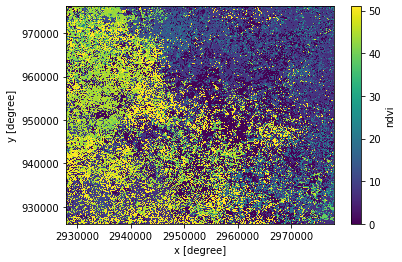

In [40]:
ts_1_argmax.plot.imshow()

In [52]:
ts_1_argmax.where(np.isnan(ts_1_argmax), other=1).sum().compute()

<xarray.DataArray 'ndvi' ()>
array(25020004)

In [53]:
5002*5002

25020004

In [41]:
#ts_1_times_clean.plot()

In [54]:
ts_1_max = ts_1_times_clean.max(axis=0)

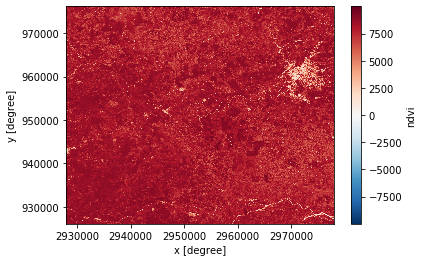

In [55]:
ts_1_max.plot.imshow()

In [57]:
ts_1_mean = ts_1_times_clean.mean(axis=0)

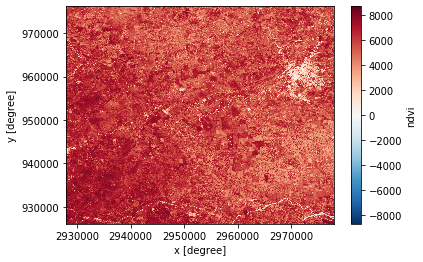

In [58]:
ts_1_mean.plot.imshow()

### me salto segmentacion using NDVI mean y mejor la cargo

# Segmentation using NDVI mean 

In [53]:
from django.contrib.gis.geos.geometry import GEOSGeometry
import gc
from importlib import import_module
import os

from madmex.settings import TEMP_DIR
from madmex.util import parser_extra_args

In [54]:
algorithm = 'bis' #'slic'
name = 'NDVI_mean_03_12_2019_sentinel2'
extra_args = parser_extra_args(['t=40','s=0.5','c=0.7']) #for slic: parser_extra_args(['n_segments=10000', 'compactness=0.5'])

In [55]:
band_list = ['ndvi_mean']

In [56]:
module = import_module('madmex.segmentation.%s' % algorithm)
Segmentation = module.Segmentation

In [57]:
path = os.path.join(TEMP_DIR) + '/segmentation_results/'

In [58]:
path

'/shared_volume/temp/segmentation_results/'

In [59]:
if not os.path.exists(path):
    os.makedirs(path)

In [60]:
seg = Segmentation.from_geoarray(sr_mean, **extra_args)

In [61]:
seg.geobox.extent.wkt

'POLYGON ((2927940 976140,2927940 926120,2977960 926120,2977960 976140,2927940 976140))'

In [62]:
seg.segment()


In [63]:
seg.segments_array

array([[165086, 165086, 165781, ..., 165780, 165780, 165780],
       [165086, 165781, 165781, ..., 165780, 165780, 165780],
       [165086, 165781, 165781, ..., 165780, 165780, 165780],
       ...,
       [     0,      0,      0, ...,    439,    439,    439],
       [     0,      0,      0, ...,    439,    439,    439],
       [     0,      0,      0, ...,    439,    439,    439]], dtype=int32)

In [64]:
fc = seg.polygonize()

In [65]:
fc[0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[2929200.0, 976140.0],
    [2929270.0, 976140.0],
    [2929270.0, 976110.0],
    [2929260.0, 976110.0],
    [2929230.0, 976110.0],
    [2929230.0, 976130.0],
    [2929210.0, 976130.0],
    [2929210.0, 976120.0],
    [2929200.0, 976120.0],
    [2929200.0, 976140.0]]]},
 'properties': {'id': 166182.0}}

In [66]:
name_file = name + '_' + algorithm + '_t_' + str(extra_args['t']) +'_s_'+ str(extra_args['s']) +'_c_'+ str(extra_args['c']) + '.shp'

In [67]:
name_file

'NDVI_mean_03_12_2019_sentinel2_bis_t_40_s_0.5_c_0.7.shp'

In [299]:
shp_path = seg.to_shapefile(filename=path + '/' +name_file, fc=fc)


In [300]:
shp_path

'/shared_volume/temp/segmentation_results//NDVI_mean_03_12_2019_sentinel2_bis_t_40_s_0.5_c_0.7.shp'

## Unsupervised clustering based on a date of ts_1_times_clean

The idea is label segments (generated from segmentation based in ndvi_mean) with a value based on unsupervised clustering (K Means) using a date of DataArray ts_1_times_clean (for example 3rd date)

For each segment we need to calculate a mean of the ndvi value (interpolated) that surrounds a number of pixels for a given date. We use already implemented zonal statistics in antares3

https://github.com/CONABIO/antares3/blob/rapideye-support/madmex/overlay/extractions.py

In [163]:
from operator import itemgetter

from affine import Affine
from rasterio.features import rasterize
from collections import OrderedDict
import fiona
import scipy
import pandas as pd


from madmex.overlay.conversions import rasterize_xarray
from madmex.util import chunk

In [63]:
input_file = '/shared_volume/temp/segmentation_results//NDVI_mean_03_12_2019_sentinel2_bis_t_40_s_0.5_c_0.7.shp'

In [64]:
with fiona.open(input_file) as src:
            fc = list(src)

In [65]:
fc[0]

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('id', 166182)]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(2929200.0, 976140.0),
    (2929270.0, 976140.0),
    (2929270.0, 976110.0),
    (2929260.0, 976110.0),
    (2929230.0, 976110.0),
    (2929230.0, 976130.0),
    (2929210.0, 976130.0),
    (2929210.0, 976120.0),
    (2929200.0, 976120.0),
    (2929200.0, 976140.0)]]}}

In [66]:
fc_subset=[(x['properties']['id'], x['geometry']) for x in fc]

In [67]:
fc_subset[0]

(166182,
 {'type': 'Polygon',
  'coordinates': [[(2929200.0, 976140.0),
    (2929270.0, 976140.0),
    (2929270.0, 976110.0),
    (2929260.0, 976110.0),
    (2929230.0, 976110.0),
    (2929230.0, 976130.0),
    (2929210.0, 976130.0),
    (2929210.0, 976120.0),
    (2929200.0, 976120.0),
    (2929200.0, 976140.0)]]})

In [68]:
fc_sorted = sorted(fc_subset, key=itemgetter(0))

In [69]:
fc_sorted[0]

(0,
 {'type': 'Polygon',
  'coordinates': [[(2928000.0, 926280.0),
    (2928010.0, 926280.0),
    (2928010.0, 926270.0),
    (2928030.0, 926270.0),
    (2928030.0, 926260.0),
    (2928040.0, 926260.0),
    (2928040.0, 926250.0),
    (2928050.0, 926250.0),
    (2928050.0, 926230.0),
    (2928090.0, 926230.0),
    (2928090.0, 926220.0),
    (2928100.0, 926220.0),
    (2928100.0, 926170.0),
    (2928090.0, 926170.0),
    (2928090.0, 926150.0),
    (2928080.0, 926150.0),
    (2928080.0, 926130.0),
    (2928070.0, 926130.0),
    (2928070.0, 926120.0),
    (2927940.0, 926120.0),
    (2927940.0, 926260.0),
    (2927970.0, 926260.0),
    (2927980.0, 926260.0),
    (2927980.0, 926270.0),
    (2927990.0, 926270.0),
    (2928000.0, 926270.0),
    (2928000.0, 926280.0)],
   [(2928060.0, 926180.0),
    (2928070.0, 926180.0),
    (2928070.0, 926210.0),
    (2928060.0, 926210.0),
    (2928060.0, 926220.0),
    (2928030.0, 926220.0),
    (2928030.0, 926170.0),
    (2928060.0, 926170.0),
    (2928060.0

In [70]:
sr_0.affine

Affine(10.0, 0.0, 2927940.0,
       0.0, -10.0, 976140.0)

In [71]:
list(sr_0.affine)

[10.0, 0.0, 2927940.0, 0.0, -10.0, 976140.0, 0.0, 0.0, 1.0]

In [72]:
list(sr_0.affine)[0:6]

[10.0, 0.0, 2927940.0, 0.0, -10.0, 976140.0]

In [73]:
aff = Affine(*list(sr_0.affine)[0:6])

In [74]:
dimensions_dataset = list(sr_0.coords)
list_dimensions = [x for x in dimensions_dataset if x != 'time']
lambda_function = lambda l_netcdf,l_test: l_netcdf[0] if l_netcdf[0] in l_test else l_netcdf[1]
xdim = lambda_function(list_dimensions,['x','longitude'])
ydim = lambda_function(list_dimensions,['y','latitude'])

In [75]:
xdim,ydim

('x', 'y')

In [76]:
len([k[0] for k in fc_sorted])

166193

First position of fc_sorted is id, second position is geometry

In [77]:
iterable_zip = zip([k[1] for k in fc_sorted], [k[0] for k in fc_sorted])

In [78]:
iterable_zip

**fc_raster is seg.segments_array !!!**

In [79]:
fc_raster = rasterize(iterable_zip, transform=aff,
                      out_shape=(sr_0.sizes[ydim], sr_0.sizes[xdim]),
                      dtype='float64', fill=np.nan)

In [82]:
fc_raster

array([[165086., 165086., 165781., ..., 165780., 165780., 165780.],
       [165086., 165781., 165781., ..., 165780., 165780., 165780.],
       [165086., 165781., 165781., ..., 165780., 165780., 165780.],
       ...,
       [     0.,      0.,      0., ...,    439.,    439.,    439.],
       [     0.,      0.,      0., ...,    439.,    439.,    439.],
       [     0.,      0.,      0., ...,    439.,    439.,    439.]])

In [84]:
fc_raster = fc_raster.astype(int)

In [85]:
fc_raster

array([[165086, 165086, 165781, ..., 165780, 165780, 165780],
       [165086, 165781, 165781, ..., 165780, 165780, 165780],
       [165086, 165781, 165781, ..., 165780, 165780, 165780],
       ...,
       [     0,      0,      0, ...,    439,    439,    439],
       [     0,      0,      0, ...,    439,    439,    439],
       [     0,      0,      0, ...,    439,    439,    439]])

In [165]:
#seg.segments_array

array([[165086, 165086, 165781, ..., 165780, 165780, 165780],
       [165086, 165781, 165781, ..., 165780, 165780, 165780],
       [165086, 165781, 165781, ..., 165780, 165780, 165780],
       ...,
       [     0,      0,      0, ...,    439,    439,    439],
       [     0,      0,      0, ...,    439,    439,    439],
       [     0,      0,      0, ...,    439,    439,    439]], dtype=int32)

In [166]:
#fc_raster = seg.segments_array

In [86]:
fc_raster.shape

(5002, 5002)

In [87]:
fc_dataarray = xr.DataArray(fc_raster, dims=[ydim, xdim], name='features_id')

In [88]:
fc_dataarray

<xarray.DataArray 'features_id' (y: 5002, x: 5002)>
array([[165086, 165086, 165781, ..., 165780, 165780, 165780],
       [165086, 165781, 165781, ..., 165780, 165780, 165780],
       [165086, 165781, 165781, ..., 165780, 165780, 165780],
       ...,
       [     0,      0,      0, ...,    439,    439,    439],
       [     0,      0,      0, ...,    439,    439,    439],
       [     0,      0,      0, ...,    439,    439,    439]])
Dimensions without coordinates: y, x

In [95]:
ts_1_argmax.name = 'ndvi_argmax'

In [98]:
ts_1_max.name = 'ndvi_max'

In [219]:
ts_1_mean.name = 'ndvi_mean'

### 1st way

In [99]:
combined = xr.merge([fc_dataarray, ts_1_argmax, ts_1_max])

In [100]:
combined

<xarray.Dataset>
Dimensions:      (x: 5002, y: 5002)
Coordinates:
  * x            (x) float64 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y            (y) float64 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
Data variables:
    features_id  (y, x) int64 165086 165086 165781 165781 ... 439 439 439 439
    ndvi_argmax  (y, x) int64 dask.array<chunksize=(400, 400), meta=np.ndarray>
    ndvi_max     (y, x) float64 dask.array<chunksize=(400, 400), meta=np.ndarray>

In [101]:
combined = combined.stack(z=(xdim, ydim))

In [102]:
combined

<xarray.Dataset>
Dimensions:      (z: 25020004)
Coordinates:
  * z            (z) MultiIndex
  - x            (z) float64 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  - y            (z) float64 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
Data variables:
    features_id  (z) int64 165086 165086 165086 165086 ... 439 439 439 439
    ndvi_argmax  (z) int64 dask.array<chunksize=(150060,), meta=np.ndarray>
    ndvi_max     (z) float64 dask.array<chunksize=(150060,), meta=np.ndarray>

In [103]:
combined=combined.reset_index('z')

In [104]:
combined

<xarray.Dataset>
Dimensions:      (z: 25020004)
Coordinates:
    x            (z) float64 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
    y            (z) float64 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
Dimensions without coordinates: z
Data variables:
    features_id  (z) int64 165086 165086 165086 165086 ... 439 439 439 439
    ndvi_argmax  (z) int64 dask.array<chunksize=(150060,), meta=np.ndarray>
    ndvi_max     (z) float64 dask.array<chunksize=(150060,), meta=np.ndarray>

In [105]:
combined=combined.drop([xdim,ydim])

In [106]:
combined

<xarray.Dataset>
Dimensions:      (z: 25020004)
Dimensions without coordinates: z
Data variables:
    features_id  (z) int64 165086 165086 165086 165086 ... 439 439 439 439
    ndvi_argmax  (z) int64 dask.array<chunksize=(150060,), meta=np.ndarray>
    ndvi_max     (z) float64 dask.array<chunksize=(150060,), meta=np.ndarray>

In [141]:
df = combined.to_dataframe()

In [147]:
df = df.sort_values(by='features_id')

In [148]:
df

,features_id,ndvi_argmax,ndvi_max
z,,,
50019,0,47,8500.111932
40009,0,45,8145.345768
40010,0,45,8222.143989
40011,0,45,8222.143989
40012,0,45,8245.879901
...,...,...,...
23144254,166192,8,8740.468794
23104238,166192,16,8237.798886
23109240,166192,8,8342.214328


In [158]:
df1 = df.groupby('features_id').agg({'ndvi_argmax': lambda x: scipy.stats.mode(x)[0]}).reset_index()

In [166]:
df1

,features_id,ndvi_argmax
0,0,45
1,1,47
2,2,1
3,3,1
4,4,9
...,...,...
166188,166188,10
166189,166189,8
166190,166190,10
166191,166191,8


In [165]:
df2 = pd.merge(df1, df, on=['features_id', 'ndvi_argmax'], how='left')

In [167]:
df2

,features_id,ndvi_argmax,ndvi_max
0,0,45,8145.345768
1,0,45,8222.143989
2,0,45,8222.143989
3,0,45,8245.879901
4,0,45,8454.729854
...,...,...,...
13266591,166192,8,8850.792149
13266592,166192,8,8732.579542
13266593,166192,8,8740.468794
13266594,166192,8,8342.214328


In [172]:
df3 = df2.groupby('features_id').agg({'ndvi_max': 'mean'}).reset_index()

In [173]:
df3

,features_id,ndvi_max
0,0,8329.620787
1,1,8836.271786
2,2,8712.080972
3,3,8168.523593
4,4,8781.255615
...,...,...
166188,166188,5792.566969
166189,166189,8909.972359
166190,166190,7182.969127
166191,166191,7103.412757


In [175]:
dff = pd.merge(df1, df3, on=['features_id'], how='left')

In [176]:
dff

,features_id,ndvi_argmax,ndvi_max
0,0,45,8329.620787
1,1,47,8836.271786
2,2,1,8712.080972
3,3,1,8168.523593
4,4,9,8781.255615
...,...,...,...
166188,166188,10,5792.566969
166189,166189,8,8909.972359
166190,166190,10,7182.969127
166191,166191,8,7103.412757


#### 2nd way

In [220]:
combined = xr.merge([fc_dataarray, ts_1_argmax, ts_1_mean])

In [221]:
combined = combined.stack(z=(xdim, ydim))
combined=combined.reset_index('z')
combined=combined.drop([xdim,ydim])

In [222]:
df = combined.to_dataframe()

In [223]:
df = df.sort_values(by='features_id')

In [224]:
df1 = df.groupby('features_id').agg({'ndvi_argmax': lambda x: scipy.stats.mode(x)[0]}).reset_index()

In [225]:
df2 = pd.merge(df1, df, on=['features_id', 'ndvi_argmax'], how='left')

In [226]:
df3 = df2.groupby('features_id').agg({'ndvi_mean': 'mean'}).reset_index()

In [227]:
dff2 = pd.merge(df1, df3, on=['features_id'], how='left')

In [228]:
dff2

,features_id,ndvi_argmax,ndvi_mean
0,0,45,6749.764703
1,1,47,7591.373487
2,2,1,7239.176243
3,3,1,6007.366345
4,4,9,7669.028774
...,...,...,...
166188,166188,10,3102.848117
166189,166189,8,6445.429191
166190,166190,10,4269.640659
166191,166191,8,4921.413290


### 3rd way

In [229]:
combined = xr.merge([fc_dataarray, ts_1_argmax, ts_1_max, ts_1_mean])

In [230]:
combined = combined.stack(z=(xdim, ydim))
combined=combined.reset_index('z')
combined=combined.drop([xdim,ydim])

In [231]:
df = combined.to_dataframe()

In [232]:
df = df.sort_values(by='features_id')

In [233]:
df1 = df.groupby('features_id').agg({'ndvi_argmax': lambda x: scipy.stats.mode(x)[0]}).reset_index()

In [234]:
df2 = pd.merge(df1, df, on=['features_id', 'ndvi_argmax'], how='left')

In [237]:
df3 = df2.groupby('features_id').agg({'ndvi_max': 'mean', 'ndvi_mean': 'mean'}).reset_index()

In [238]:
dff3 = pd.merge(df1, df3, on=['features_id'], how='left')

In [239]:
dff3

,features_id,ndvi_argmax,ndvi_max,ndvi_mean
0,0,45,8329.620787,6749.764703
1,1,47,8836.271786,7591.373487
2,2,1,8712.080972,7239.176243
3,3,1,8168.523593,6007.366345
4,4,9,8781.255615,7669.028774
...,...,...,...,...
166188,166188,10,5792.566969,3102.848117
166189,166189,8,8909.972359,6445.429191
166190,166190,10,7182.969127,4269.640659
166191,166191,8,7103.412757,4921.413290


**Join df with fc in geopandas dataframe form**

In [177]:
import geopandas as gpd

In [178]:
fc[0]

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('id', 166182)]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(2929200.0, 976140.0),
    (2929270.0, 976140.0),
    (2929270.0, 976110.0),
    (2929260.0, 976110.0),
    (2929230.0, 976110.0),
    (2929230.0, 976130.0),
    (2929210.0, 976130.0),
    (2929210.0, 976120.0),
    (2929200.0, 976120.0),
    (2929200.0, 976140.0)]]}}

In [179]:
gdf = gpd.GeoDataFrame.from_features([feature for feature in fc], crs = var[1].geobox.crs.crs_str)

In [180]:
gdf.head()

,geometry,id
0,"POLYGON ((2929200.000 976140.000, 2929270.000 ...",166182
1,"POLYGON ((2930600.000 976140.000, 2930620.000 ...",166171
2,"POLYGON ((2932180.000 976140.000, 2932280.000 ...",166153
3,"POLYGON ((2933070.000 976140.000, 2933110.000 ...",166155
4,"POLYGON ((2933850.000 976140.000, 2933950.000 ...",166156


In [181]:
gdf = gdf.rename(columns={'id':'features_id'})

In [182]:
gdf

,geometry,features_id
0,"POLYGON ((2929200.000 976140.000, 2929270.000 ...",166182
1,"POLYGON ((2930600.000 976140.000, 2930620.000 ...",166171
2,"POLYGON ((2932180.000 976140.000, 2932280.000 ...",166153
3,"POLYGON ((2933070.000 976140.000, 2933110.000 ...",166155
4,"POLYGON ((2933850.000 976140.000, 2933950.000 ...",166156
...,...,...
166188,"POLYGON ((2976280.000 926230.000, 2976320.000 ...",425
166189,"POLYGON ((2976320.000 926300.000, 2976340.000 ...",426
166190,"POLYGON ((2976600.000 926160.000, 2976630.000 ...",430
166191,"POLYGON ((2977400.000 926250.000, 2977450.000 ...",436


In [183]:
gdf_df_join = gdf.merge(dff, on='features_id', how='left')

In [184]:
gdf_df_join

,geometry,features_id,ndvi_argmax,ndvi_max
0,"POLYGON ((2929200.000 976140.000, 2929270.000 ...",166182,44,8595.500654
1,"POLYGON ((2930600.000 976140.000, 2930620.000 ...",166171,45,7199.138869
2,"POLYGON ((2932180.000 976140.000, 2932280.000 ...",166153,12,8227.853098
3,"POLYGON ((2933070.000 976140.000, 2933110.000 ...",166155,44,7646.495188
4,"POLYGON ((2933850.000 976140.000, 2933950.000 ...",166156,44,8534.379017
...,...,...,...,...
166188,"POLYGON ((2976280.000 926230.000, 2976320.000 ...",425,6,8288.181151
166189,"POLYGON ((2976320.000 926300.000, 2976340.000 ...",426,6,8505.828948
166190,"POLYGON ((2976600.000 926160.000, 2976630.000 ...",430,4,7065.339483
166191,"POLYGON ((2977400.000 926250.000, 2977450.000 ...",436,8,8940.448085


### 2nd way

In [240]:
gdf_df_join2 = gdf.merge(dff2, on='features_id', how='left')

In [241]:
gdf_df_join2

,geometry,features_id,ndvi_argmax,ndvi_mean
0,"POLYGON ((2929200.000 976140.000, 2929270.000 ...",166182,44,5523.971117
1,"POLYGON ((2930600.000 976140.000, 2930620.000 ...",166171,45,5072.610939
2,"POLYGON ((2932180.000 976140.000, 2932280.000 ...",166153,12,5112.547331
3,"POLYGON ((2933070.000 976140.000, 2933110.000 ...",166155,44,5203.201071
4,"POLYGON ((2933850.000 976140.000, 2933950.000 ...",166156,44,6087.342948
...,...,...,...,...
166188,"POLYGON ((2976280.000 926230.000, 2976320.000 ...",425,6,6523.896076
166189,"POLYGON ((2976320.000 926300.000, 2976340.000 ...",426,6,7048.215146
166190,"POLYGON ((2976600.000 926160.000, 2976630.000 ...",430,4,4817.798248
166191,"POLYGON ((2977400.000 926250.000, 2977450.000 ...",436,8,8220.912233


### 3rd way

In [242]:
gdf_df_join3 = gdf.merge(dff3, on='features_id', how='left')

In [243]:
gdf_df_join3

,geometry,features_id,ndvi_argmax,ndvi_max,ndvi_mean
0,"POLYGON ((2929200.000 976140.000, 2929270.000 ...",166182,44,8595.500654,5523.971117
1,"POLYGON ((2930600.000 976140.000, 2930620.000 ...",166171,45,7199.138869,5072.610939
2,"POLYGON ((2932180.000 976140.000, 2932280.000 ...",166153,12,8227.853098,5112.547331
3,"POLYGON ((2933070.000 976140.000, 2933110.000 ...",166155,44,7646.495188,5203.201071
4,"POLYGON ((2933850.000 976140.000, 2933950.000 ...",166156,44,8534.379017,6087.342948
...,...,...,...,...,...
166188,"POLYGON ((2976280.000 926230.000, 2976320.000 ...",425,6,8288.181151,6523.896076
166189,"POLYGON ((2976320.000 926300.000, 2976340.000 ...",426,6,8505.828948,7048.215146
166190,"POLYGON ((2976600.000 926160.000, 2976630.000 ...",430,4,7065.339483,4817.798248
166191,"POLYGON ((2977400.000 926250.000, 2977450.000 ...",436,8,8940.448085,8220.912233


In [185]:
gdf_df_join[gdf_df_join.features_id==166192]

,geometry,features_id,ndvi_argmax,ndvi_max
31,"POLYGON ((2974130.000 976140.000, 2974230.000 ...",166192,8,8693.487354


In [244]:
gdf_df_join2[gdf_df_join2.features_id==166192]

,geometry,features_id,ndvi_argmax,ndvi_mean
31,"POLYGON ((2974130.000 976140.000, 2974230.000 ...",166192,8,6533.662208


In [245]:
gdf_df_join3[gdf_df_join3.features_id==166192]

,geometry,features_id,ndvi_argmax,ndvi_max,ndvi_mean
31,"POLYGON ((2974130.000 976140.000, 2974230.000 ...",166192,8,8693.487354,6533.662208


In [187]:
path = '/shared_volume/temp/segmentation_results/'

In [249]:
str(var[0][0]) + '_' + str(var[0][1])

'39_-30'

In [304]:
name_file = 'ndvi_argmax_max_'+ str(var[0][0]) + '_' + str(var[0][1]) + '_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7.shp'

In [305]:
name_file2 = 'ndvi_argmax_mean_'+ str(var[0][0]) + '_' + str(var[0][1]) + '_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7.shp'

In [306]:
name_file3 = 'ndvi_argmax_max_mean_'+ str(var[0][0]) + '_' + str(var[0][1]) + '_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7.shp'

In [307]:
name_file3

'ndvi_argmax_max_mean_39_-30_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7.shp'

## Unsupervised clustering

In [191]:
from sklearn.cluster import KMeans


In [194]:
gdf_df_join[['ndvi_argmax','ndvi_max']]

,ndvi_argmax,ndvi_max
0,44,8595.500654
1,45,7199.138869
2,12,8227.853098
3,44,7646.495188
4,44,8534.379017
...,...,...
166188,6,8288.181151
166189,6,8505.828948
166190,4,7065.339483
166191,8,8940.448085


In [195]:
kmeans = KMeans(n_clusters=30)

In [196]:
kmeans.fit(gdf_df_join[['ndvi_argmax','ndvi_max']].fillna(0).values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [197]:
preds = kmeans.predict(gdf_df_join[['ndvi_argmax','ndvi_max']].fillna(0).values)

In [198]:
preds

array([ 8, 13, 21, ...,  7, 17, 25], dtype=int32)

In [199]:
preds.shape

(166193,)

In [200]:
# Get centers of the clusters
centers = kmeans.cluster_centers_

In [201]:
centers

array([[  22.13828682, 8820.45303968],
       [  16.0480048 , 6425.54898969],
       [  14.87974684, 2853.80793629],
       [  16.71111398, 7590.37334785],
       [  14.72156619, 5157.90330999],
       [  17.51200452, 8300.33405188],
       [  14.99361314, 4280.71370054],
       [  16.62267822, 7080.31997196],
       [  18.4028109 , 8566.16695721],
       [  22.3877551 , 1108.29668474],
       [  17.07201015, 8029.4525923 ],
       [  14.89347537, 5873.31961339],
       [  14.4184466 , 3310.12716789],
       [  16.70467503, 7262.62794925],
       [  14.75      , 4734.12194742],
       [  16.52334582, 6662.50529708],
       [  14.53817505, 1855.5577428 ],
       [  20.96730753, 8941.41133342],
       [  14.97738033, 5540.88169958],
       [  17.59355416, 8434.12322789],
       [  15.63585329, 6167.23946   ],
       [  17.24539148, 8166.68909431],
       [  17.20845722, 7888.89020923],
       [  16.63215859, 6881.54012827],
       [  16.49353667, 7430.55208507],
       [  20.16281463, 86

In [202]:
centers.shape

(30, 2)

In [203]:
gdf_df_join['preds'] = preds

In [204]:
gdf_df_join

,geometry,features_id,ndvi_argmax,ndvi_max,preds
0,"POLYGON ((2929200.000 976140.000, 2929270.000 ...",166182,44,8595.500654,8
1,"POLYGON ((2930600.000 976140.000, 2930620.000 ...",166171,45,7199.138869,13
2,"POLYGON ((2932180.000 976140.000, 2932280.000 ...",166153,12,8227.853098,21
3,"POLYGON ((2933070.000 976140.000, 2933110.000 ...",166155,44,7646.495188,3
4,"POLYGON ((2933850.000 976140.000, 2933950.000 ...",166156,44,8534.379017,8
...,...,...,...,...,...
166188,"POLYGON ((2976280.000 926230.000, 2976320.000 ...",425,6,8288.181151,5
166189,"POLYGON ((2976320.000 926300.000, 2976340.000 ...",426,6,8505.828948,8
166190,"POLYGON ((2976600.000 926160.000, 2976630.000 ...",430,4,7065.339483,7
166191,"POLYGON ((2977400.000 926250.000, 2977450.000 ...",436,8,8940.448085,17


In [312]:
name_file_ndvi = name_file.split('.shp')[0] + '_ndvi' + '.shp'

In [308]:
gdf_df_join_ndvi = gdf_df_join.drop(['preds'],axis=1)

In [309]:
gdf_df_join_ndvi

,geometry,features_id,ndvi_argmax,ndvi_max
0,"POLYGON ((2929200.000 976140.000, 2929270.000 ...",166182,44,8595.500654
1,"POLYGON ((2930600.000 976140.000, 2930620.000 ...",166171,45,7199.138869
2,"POLYGON ((2932180.000 976140.000, 2932280.000 ...",166153,12,8227.853098
3,"POLYGON ((2933070.000 976140.000, 2933110.000 ...",166155,44,7646.495188
4,"POLYGON ((2933850.000 976140.000, 2933950.000 ...",166156,44,8534.379017
...,...,...,...,...
166188,"POLYGON ((2976280.000 926230.000, 2976320.000 ...",425,6,8288.181151
166189,"POLYGON ((2976320.000 926300.000, 2976340.000 ...",426,6,8505.828948
166190,"POLYGON ((2976600.000 926160.000, 2976630.000 ...",430,4,7065.339483
166191,"POLYGON ((2977400.000 926250.000, 2977450.000 ...",436,8,8940.448085


In [310]:
gdf_df_join_ndvi[gdf_df_join.features_id==166192]

,geometry,features_id,ndvi_argmax,ndvi_max
31,"POLYGON ((2974130.000 976140.000, 2974230.000 ...",166192,8,8693.487354


In [313]:
path + name_file_ndvi

'/shared_volume/temp/segmentation_results/ndvi_argmax_max_39_-30_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7_ndvi.shp'

In [314]:
gdf_df_join_ndvi.to_file(path + name_file_ndvi)

In [315]:
name_file_cluster = name_file.split('.shp')[0] + '_cluster' + '.shp'

In [316]:
name_file_cluster

'ndvi_argmax_max_39_-30_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7_cluster.shp'

In [317]:
gdf_df_cluster = gdf_df_join.drop(['ndvi_argmax','ndvi_max'],axis=1)

In [318]:
gdf_df_cluster

,geometry,features_id,preds
0,"POLYGON ((2929200.000 976140.000, 2929270.000 ...",166182,8
1,"POLYGON ((2930600.000 976140.000, 2930620.000 ...",166171,13
2,"POLYGON ((2932180.000 976140.000, 2932280.000 ...",166153,21
3,"POLYGON ((2933070.000 976140.000, 2933110.000 ...",166155,3
4,"POLYGON ((2933850.000 976140.000, 2933950.000 ...",166156,8
...,...,...,...
166188,"POLYGON ((2976280.000 926230.000, 2976320.000 ...",425,5
166189,"POLYGON ((2976320.000 926300.000, 2976340.000 ...",426,8
166190,"POLYGON ((2976600.000 926160.000, 2976630.000 ...",430,7
166191,"POLYGON ((2977400.000 926250.000, 2977450.000 ...",436,17


In [319]:
gdf_df_cluster[gdf_df_join.features_id==166192]

,geometry,features_id,preds
31,"POLYGON ((2974130.000 976140.000, 2974230.000 ...",166192,25


In [320]:
gdf_df_cluster.to_file(path + name_file_cluster)

In [321]:
path + name_file_cluster

'/shared_volume/temp/segmentation_results/ndvi_argmax_max_39_-30_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7_cluster.shp'

### 2nd way

In [260]:
gdf_df_join2[['ndvi_argmax','ndvi_mean']]

,ndvi_argmax,ndvi_mean
0,44,5523.971117
1,45,5072.610939
2,12,5112.547331
3,44,5203.201071
4,44,6087.342948
...,...,...
166188,6,6523.896076
166189,6,7048.215146
166190,4,4817.798248
166191,8,8220.912233


In [261]:
kmeans2 = KMeans(n_clusters=30)

In [262]:
kmeans2.fit(gdf_df_join2[['ndvi_argmax','ndvi_mean']].fillna(0).values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [263]:
preds2 = kmeans2.predict(gdf_df_join2[['ndvi_argmax','ndvi_mean']].fillna(0).values)

In [264]:
preds2.shape

(166193,)

In [265]:
# Get centers of the clusters
centers2 = kmeans2.cluster_centers_

In [266]:
centers2

array([[   14.81597276,  4472.70232729],
       [   18.24391338,  6424.50972591],
       [   14.79569267,  2202.18441664],
       [   15.73007267,  5303.0493899 ],
       [   28.27984873,  7389.73043947],
       [   14.64859982,  3719.43279985],
       [   16.53664024,  5875.41352672],
       [   14.70576271,  1283.54451831],
       [   22.55764612,  6980.22082228],
       [   15.11322259,  4901.66394079],
       [   13.79962406,  3049.95068961],
       [   14.40643785,  3993.99868106],
       [   20.45869565,   199.6550404 ],
       [   25.36490499,  7178.24996363],
       [   20.63937047,  6789.23608099],
       [   17.70186603,  6242.48827408],
       [   15.90723838,  5689.73158073],
       [   14.85413492,  4692.59646369],
       [   14.90891449,  5103.90308924],
       [   14.95372962,  4239.07479575],
       [   14.41022162,  2639.48939726],
       [   14.56396867,   822.62051676],
       [   13.67922849,  3413.09945923],
       [   16.93002424,  6059.54611177],
       [   14.78

In [267]:
gdf_df_join2['preds'] = preds2

In [322]:
name_file_ndvi2 = name_file2.split('.shp')[0] + '_ndvi' + '.shp'

In [323]:
gdf_df_join_ndvi2 = gdf_df_join2.drop(['preds'],axis=1)

In [324]:
gdf_df_join_ndvi2

,geometry,features_id,ndvi_argmax,ndvi_mean
0,"POLYGON ((2929200.000 976140.000, 2929270.000 ...",166182,44,5523.971117
1,"POLYGON ((2930600.000 976140.000, 2930620.000 ...",166171,45,5072.610939
2,"POLYGON ((2932180.000 976140.000, 2932280.000 ...",166153,12,5112.547331
3,"POLYGON ((2933070.000 976140.000, 2933110.000 ...",166155,44,5203.201071
4,"POLYGON ((2933850.000 976140.000, 2933950.000 ...",166156,44,6087.342948
...,...,...,...,...
166188,"POLYGON ((2976280.000 926230.000, 2976320.000 ...",425,6,6523.896076
166189,"POLYGON ((2976320.000 926300.000, 2976340.000 ...",426,6,7048.215146
166190,"POLYGON ((2976600.000 926160.000, 2976630.000 ...",430,4,4817.798248
166191,"POLYGON ((2977400.000 926250.000, 2977450.000 ...",436,8,8220.912233


In [325]:
path + name_file_ndvi2

'/shared_volume/temp/segmentation_results/ndvi_argmax_mean_39_-30_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7_ndvi.shp'

In [326]:
gdf_df_join_ndvi2.to_file(path + name_file_ndvi2)

In [327]:
name_file_cluster2 = name_file2.split('.shp')[0] + '_cluster' + '.shp'

In [328]:
gdf_df_cluster2 = gdf_df_join2.drop(['ndvi_argmax','ndvi_mean'],axis=1)

In [329]:
gdf_df_cluster2

,geometry,features_id,preds
0,"POLYGON ((2929200.000 976140.000, 2929270.000 ...",166182,27
1,"POLYGON ((2930600.000 976140.000, 2930620.000 ...",166171,18
2,"POLYGON ((2932180.000 976140.000, 2932280.000 ...",166153,18
3,"POLYGON ((2933070.000 976140.000, 2933110.000 ...",166155,18
4,"POLYGON ((2933850.000 976140.000, 2933950.000 ...",166156,23
...,...,...,...
166188,"POLYGON ((2976280.000 926230.000, 2976320.000 ...",425,28
166189,"POLYGON ((2976320.000 926300.000, 2976340.000 ...",426,8
166190,"POLYGON ((2976600.000 926160.000, 2976630.000 ...",430,9
166191,"POLYGON ((2977400.000 926250.000, 2977450.000 ...",436,25


In [330]:
path + name_file_cluster2

'/shared_volume/temp/segmentation_results/ndvi_argmax_mean_39_-30_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7_cluster.shp'

In [331]:
gdf_df_cluster2.to_file(path + name_file_cluster2)

### 3rd way

In [278]:
gdf_df_join3[['ndvi_argmax','ndvi_max', 'ndvi_mean']]

,ndvi_argmax,ndvi_max,ndvi_mean
0,44,8595.500654,5523.971117
1,45,7199.138869,5072.610939
2,12,8227.853098,5112.547331
3,44,7646.495188,5203.201071
4,44,8534.379017,6087.342948
...,...,...,...
166188,6,8288.181151,6523.896076
166189,6,8505.828948,7048.215146
166190,4,7065.339483,4817.798248
166191,8,8940.448085,8220.912233


In [279]:
kmeans3 = KMeans(n_clusters=30)

In [280]:
kmeans3.fit(gdf_df_join3[['ndvi_argmax','ndvi_max','ndvi_mean']].fillna(0).values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [281]:
preds3 = kmeans3.predict(gdf_df_join3[['ndvi_argmax','ndvi_max','ndvi_mean']].fillna(0).values)

In [282]:
preds3.shape

(166193,)

In [283]:
# Get centers of the clusters
centers3 = kmeans3.cluster_centers_

In [284]:
centers3

array([[  14.32697906, 8727.50791053, 6360.44454796],
       [  17.32727273, 6549.26221729, 4298.86340685],
       [  14.39949431, 2538.28568134,  973.93126938],
       [  10.08163707, 8425.44099098, 5200.28158772],
       [  26.02273823, 8828.58178084, 7230.24634843],
       [  21.65433875, 7925.42460299, 6069.81665724],
       [  15.30381166, 4209.6384586 , 2028.30847178],
       [  19.498395  , 7307.81808717, 5233.1457053 ],
       [  13.99054889, 5581.4903785 , 3252.76089441],
       [  14.19009585, 7153.98642311, 4295.31862145],
       [  21.66179736, 8282.58929022, 6434.88761018],
       [  24.33033887, 8513.21266577, 6814.94678573],
       [  17.92580645, 1624.12110408,  270.61175441],
       [  15.89482612, 5496.27515823, 2337.17910066],
       [  15.42594822, 8133.41651614, 5621.42839125],
       [  13.40420032, 7689.92476003, 4052.2126981 ],
       [  29.92288027, 8917.94724301, 7675.99759512],
       [  14.03993933, 6382.88649828, 3138.54421433],
       [  16.60012266, 8360.

In [285]:
gdf_df_join3['preds'] = preds3

In [332]:
name_file_ndvi3 = name_file3.split('.shp')[0] + '_ndvi' + '.shp'

In [333]:
gdf_df_join_ndvi3 = gdf_df_join3.drop(['preds'],axis=1)

In [334]:
gdf_df_join_ndvi3

,geometry,features_id,ndvi_argmax,ndvi_max,ndvi_mean
0,"POLYGON ((2929200.000 976140.000, 2929270.000 ...",166182,44,8595.500654,5523.971117
1,"POLYGON ((2930600.000 976140.000, 2930620.000 ...",166171,45,7199.138869,5072.610939
2,"POLYGON ((2932180.000 976140.000, 2932280.000 ...",166153,12,8227.853098,5112.547331
3,"POLYGON ((2933070.000 976140.000, 2933110.000 ...",166155,44,7646.495188,5203.201071
4,"POLYGON ((2933850.000 976140.000, 2933950.000 ...",166156,44,8534.379017,6087.342948
...,...,...,...,...,...
166188,"POLYGON ((2976280.000 926230.000, 2976320.000 ...",425,6,8288.181151,6523.896076
166189,"POLYGON ((2976320.000 926300.000, 2976340.000 ...",426,6,8505.828948,7048.215146
166190,"POLYGON ((2976600.000 926160.000, 2976630.000 ...",430,4,7065.339483,4817.798248
166191,"POLYGON ((2977400.000 926250.000, 2977450.000 ...",436,8,8940.448085,8220.912233


In [335]:
path + name_file_ndvi3

'/shared_volume/temp/segmentation_results/ndvi_argmax_max_mean_39_-30_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7_ndvi.shp'

In [336]:
gdf_df_join_ndvi3.to_file(path + name_file_ndvi3)

In [337]:
name_file_cluster3 = name_file3.split('.shp')[0] + '_cluster' + '.shp'

In [338]:
gdf_df_cluster3 = gdf_df_join3.drop(['ndvi_argmax','ndvi_max','ndvi_mean'],axis=1)

In [339]:
gdf_df_cluster3

,geometry,features_id,preds
0,"POLYGON ((2929200.000 976140.000, 2929270.000 ...",166182,19
1,"POLYGON ((2930600.000 976140.000, 2930620.000 ...",166171,7
2,"POLYGON ((2932180.000 976140.000, 2932280.000 ...",166153,3
3,"POLYGON ((2933070.000 976140.000, 2933110.000 ...",166155,22
4,"POLYGON ((2933850.000 976140.000, 2933950.000 ...",166156,18
...,...,...,...
166188,"POLYGON ((2976280.000 926230.000, 2976320.000 ...",425,10
166189,"POLYGON ((2976320.000 926300.000, 2976340.000 ...",426,11
166190,"POLYGON ((2976600.000 926160.000, 2976630.000 ...",430,26
166191,"POLYGON ((2977400.000 926250.000, 2977450.000 ...",436,16


In [340]:
path + name_file_cluster3

'/shared_volume/temp/segmentation_results/ndvi_argmax_max_mean_39_-30_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7_cluster.shp'

In [341]:
gdf_df_cluster3.to_file(path + name_file_cluster3)

## Save shapefiles with segments intersected with shp_puntos_martinez_reprojected.shp

NDVI_mean_05_12_2019_sentinel2_bis_t_40_s_0.5_c_0.7_39_-30_intersection_segments.shp contains the polygons that intersect with shp_puntos_martinez_reprojected.shp, which contains points of interest. The intersected polygons where obtained with qgis, because was faster that way.
In the following part, we do a left join of this polygons with gdf_df_cluster to get the predicted classes.

In [342]:
seg_files = '/shared_volume/tasks/2019/clusterization_Veracruz/NDVI_mean_05_12_2019_sentinel2_bis_t_40_s_0.5_c_0.7_39_-30_intersection_segments.shp'

In [343]:
gpds = gpd.read_file(seg_files)

In [344]:
gpds

,id,geometry
0,56291,"POLYGON ((2975620.000 943470.000, 2975640.000 ..."
1,43310,"POLYGON ((2971810.000 939520.000, 2971830.000 ..."
2,91164,"POLYGON ((2970910.000 954360.000, 2970930.000 ..."
3,68255,"POLYGON ((2966560.000 947290.000, 2966570.000 ..."
4,86484,"POLYGON ((2970460.000 953300.000, 2970470.000 ..."
...,...,...
320,60350,"POLYGON ((2976590.000 944790.000, 2976610.000 ..."
321,80525,"POLYGON ((2976980.000 951250.000, 2977020.000 ..."
322,6756,"POLYGON ((2949400.000 928230.000, 2949410.000 ..."
323,63452,"POLYGON ((2966440.000 945810.000, 2966450.000 ..."


In [345]:
gpds = gpds.rename(columns={'id':'features_id'})

In [346]:
gpds

,features_id,geometry
0,56291,"POLYGON ((2975620.000 943470.000, 2975640.000 ..."
1,43310,"POLYGON ((2971810.000 939520.000, 2971830.000 ..."
2,91164,"POLYGON ((2970910.000 954360.000, 2970930.000 ..."
3,68255,"POLYGON ((2966560.000 947290.000, 2966570.000 ..."
4,86484,"POLYGON ((2970460.000 953300.000, 2970470.000 ..."
...,...,...
320,60350,"POLYGON ((2976590.000 944790.000, 2976610.000 ..."
321,80525,"POLYGON ((2976980.000 951250.000, 2977020.000 ..."
322,6756,"POLYGON ((2949400.000 928230.000, 2949410.000 ..."
323,63452,"POLYGON ((2966440.000 945810.000, 2966450.000 ..."


In [349]:
gpds_cluster1 = gpds.merge(gdf_df_cluster, on=['features_id', 'geometry'], how='left')

In [350]:
name_file_gpds_cluster1 = name_file.split('.shp')[0] + '_cluster_segments' + '.shp'

In [351]:
path + name_file_gpds_cluster1

'/shared_volume/temp/segmentation_results/ndvi_argmax_max_39_-30_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7_cluster_segments.shp'

In [352]:
gpds_cluster1.to_file(path + name_file_gpds_cluster1)

### 2nd way

In [354]:
gpds_cluster2 = gpds.merge(gdf_df_cluster2, on=['features_id', 'geometry'], how='left')

In [358]:
name_file_gpds_cluster2 = name_file2.split('.shp')[0] + '_cluster_segments' + '.shp'

In [359]:
path + name_file_gpds_cluster2

'/shared_volume/temp/segmentation_results/ndvi_argmax_mean_39_-30_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7_cluster_segments.shp'

In [360]:
gpds_cluster2.to_file(path + name_file_gpds_cluster2)

### 3rd way

In [361]:
gpds_cluster3 = gpds.merge(gdf_df_cluster3, on=['features_id', 'geometry'], how='left')

In [363]:
name_file_gpds_cluster3 = name_file3.split('.shp')[0] + '_cluster_segments' + '.shp'

In [364]:
path + name_file_gpds_cluster3

'/shared_volume/temp/segmentation_results/ndvi_argmax_max_mean_39_-30_05_12_2019_sen2_bis_t_40_s_0.5_c_0.7_cluster_segments.shp'

In [365]:
gpds_cluster3.to_file(path + name_file_gpds_cluster3)

In [362]:
gpds_cluster3

,features_id,geometry,preds
0,56291,"POLYGON ((2975620.000 943470.000, 2975640.000 ...",14
1,43310,"POLYGON ((2971810.000 939520.000, 2971830.000 ...",17
2,91164,"POLYGON ((2970910.000 954360.000, 2970930.000 ...",23
3,68255,"POLYGON ((2966560.000 947290.000, 2966570.000 ...",26
4,86484,"POLYGON ((2970460.000 953300.000, 2970470.000 ...",7
...,...,...,...
320,60350,"POLYGON ((2976590.000 944790.000, 2976610.000 ...",14
321,80525,"POLYGON ((2976980.000 951250.000, 2977020.000 ...",21
322,6756,"POLYGON ((2949400.000 928230.000, 2949410.000 ...",24
323,63452,"POLYGON ((2966440.000 945810.000, 2966450.000 ...",25
